# Sport Biomechanics

## Group assignment - lab session

In this assignment, each group should assess the running-related injury risk based on the vertical instantaneous loading rate (VILR). For this, the data of two students obtained during the lab session will be used. We will analyze the right leg. In this jupyter notebook, answers on the questions should be provided by writing code, generating figures and drawing conclusions. This jupyter notebook should be uploaded on Ufora and serves as the official report for the assignment.

#### Step 1: Import packages
Import the necessary packages in the code block below (eg. packages to import data files, display figures, etc.). Some of the necessary packages are already added in the code block below, feel free to add others if needed.

In [67]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import csv
import os 
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8] # to adjust the size of the plots

#### Plotting function

In [68]:
def splot(X, Y, title = '', lb = None, axis = ['', ''], sname = '', tsp = True, ls = None, xlim = None, stitles = None):
    '''
    Simple Plot Function
    
    X : List of arrays containing plotting data on x-axis
    Y : Corresponding y values
    aadede
    title      : title of plot
    axis       : list with two elements containing name of x- and y axis 
    sname      : name of saved plot file
    tsp        : transparent background (default : True)
    '''
    
    ## make a figure with axes
    fig, ax = plt.subplots(len(X) if type(X) == list else 1)

    ## make plot title
    fig.suptitle(title, size = 16)
    
    ## plot the data
    labl = False if lb == None else True
    if type(X) == list and len(X) > 1:
        if lb == None:
            lb = ['']*len(X)
        if ls == None:
            ls = ['-']*len(X)

        for i, a in enumerate(ax):
            if stitles != None:
                a.set_title(stitles[i], size = 16)
            a.tick_params(axis='both', which='major', labelsize=12)
            a.set_xlabel(axis[0], size = 14)
            a.set_ylabel(axis[1], size = 14)
            a.plot(X[i], Y[i], lw = 2, ls = ls[i], label = lb[i])
            a.grid()
            if xlim != None:   
                a.set_xlim(xlim[i] if type(xlim) == list else xlim)
    else:
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlabel(axis[0], size = 14)
        ax.set_ylabel(axis[1], size = 14)
        ax.grid()
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.plot(X, Y, lw = 2, label = lb)
        if xlim != None:
            ax.set_xlim(xlim)

    plt.tight_layout()

    if sname != '':
        plt.savefig(sname, transparent = tsp, dpi = 300)
        
    plt.show()

#### Step 2: Load data
Load the tsv-files obtained during the lab session as a dataframe. Be aware that the tsv file contains a header which might not be located on the first row (tip: use skiprows) and has a tab instead as a comma as deliminator. You will analyze the right leg of two students of your group (three students in groups of five). 

PS: You can follow the workflow of this notebook first for one student and then for the other(s) or immediately for all at once.

In [69]:
def get_data(filename):
    # cols
    cols = ['SAMPLE', 'TIME', 'Force_X', 'Force_Y', 'Force_Z', 'Moment_X', 'Moment_Y', 'Moment_Z', 'COP_X', 'COP_Y', 'COP_Z']
    
    ## open the file and read the content (make sure line 1 -> 27 is deleted)
    with open(filename, 'r') as file: 
        data = pd.read_csv(file, delimiter = '\t', header = 0, index_col = False)
        file.close()
        
    return data

In [70]:
# names of test person
names = ['Constantijn', 'Antwanne']

# path of data
dirname = os.path.dirname('__file__')
data_dir = os.path.join(dirname, 'data')

# file names
filenames = {name : [os.path.join(data_dir, name+'_f_1.tsv'), os.path.join(data_dir, name+'_f_2.tsv')] for name in names}

In [71]:
# mass of test person
_m = {'Constantijn':60.0, 'Antwanne': 0.0}

data = {name: {'L': get_data(filenames[name][0]), 'R': get_data(filenames[name][1]), 'm': _m[name]} for name in names}



In [72]:
# showing how data is stored
data['Antwanne']['L']

,SAMPLE,TIME,Force_X,Force_Y,Force_Z,Moment_X,Moment_Y,Moment_Z,COP_X,COP_Y,COP_Z
0,1,0.000,73.319435,4.043579,970.321655,746.715546,-410.711670,-56.702423,143.773734,-119.445346,0.0
1,2,0.001,70.878029,4.196167,966.963768,740.123749,-409.857178,-57.923126,144.359912,-123.589989,0.0
2,3,0.002,66.605568,2.212524,961.775780,736.705780,-409.857178,-56.458282,146.646287,-123.015042,0.0
3,4,0.003,62.180519,-0.228882,961.165428,738.658905,-412.054443,-52.552032,149.202938,-120.496594,0.0
4,5,0.004,61.570168,-0.686646,962.691307,738.414764,-412.054443,-52.307892,148.523438,-121.968285,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29.995,43.411732,-288.319111,1611.810684,1599.511719,-651.926422,-132.997513,124.968359,103.369473,0.0
29996,29997,29.996,51.346779,-288.929462,1583.123207,1585.107422,-642.771149,-138.613129,126.514608,112.253355,0.0
29997,29998,29.997,55.619240,-284.351826,1567.254066,1561.180878,-634.225845,-142.031097,125.173281,107.124949,0.0
29998,29999,29.998,53.635597,-271.229267,1556.878090,1531.395721,-627.389908,-146.425629,123.479470,94.632393,0.0


#### Step 3: Visualize data
To check whether you loaded the correct data, plot the vertical component of the ground reaction force in function of time.

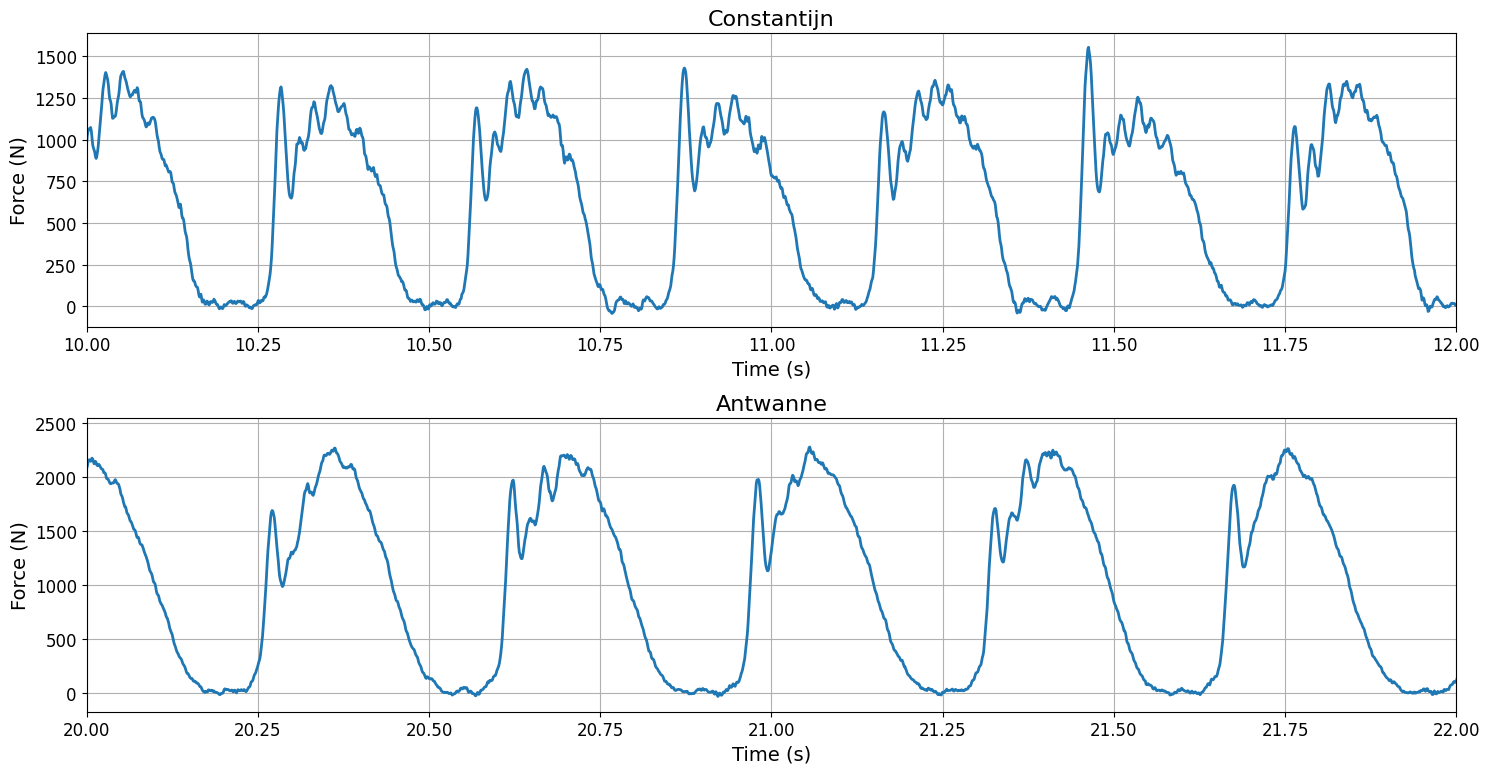

In [84]:
## get the data
l_dataC, r_dataC, l_dataA, r_dataA = data['Constantijn']['L'], data['Constantijn']['R'], data['Antwanne']['L'], data['Antwanne']['R']

# get the relevant parameters
t = l_dataC['TIME']
Fz_C, Fz_A = l_dataC['Force_Z'] + r_dataC['Force_Z'], l_dataA['Force_Z'] + r_dataA['Force_Z'] 

splot([t]*2, [Fz_C, Fz_A], axis = ['Time (s)','Force (N)'], lb = ['Constantijn', 'Antwanne'], xlim = [(10, 12), (20, 22)], stitles = ['Constantijn', 'Antwanne'])

#### Step 3: Determine the offset
Notice on the plot that even during flight phase a force is measured. Take this noise into account by calculating and substracting this offset.

**Solution***
We approximate the offset by avaraging the mean values of the $VGRF$ at a specific swing phase. Here, we take the swing phase at $t_0 = 20.26$ unitil $t_1 = 20.33$.

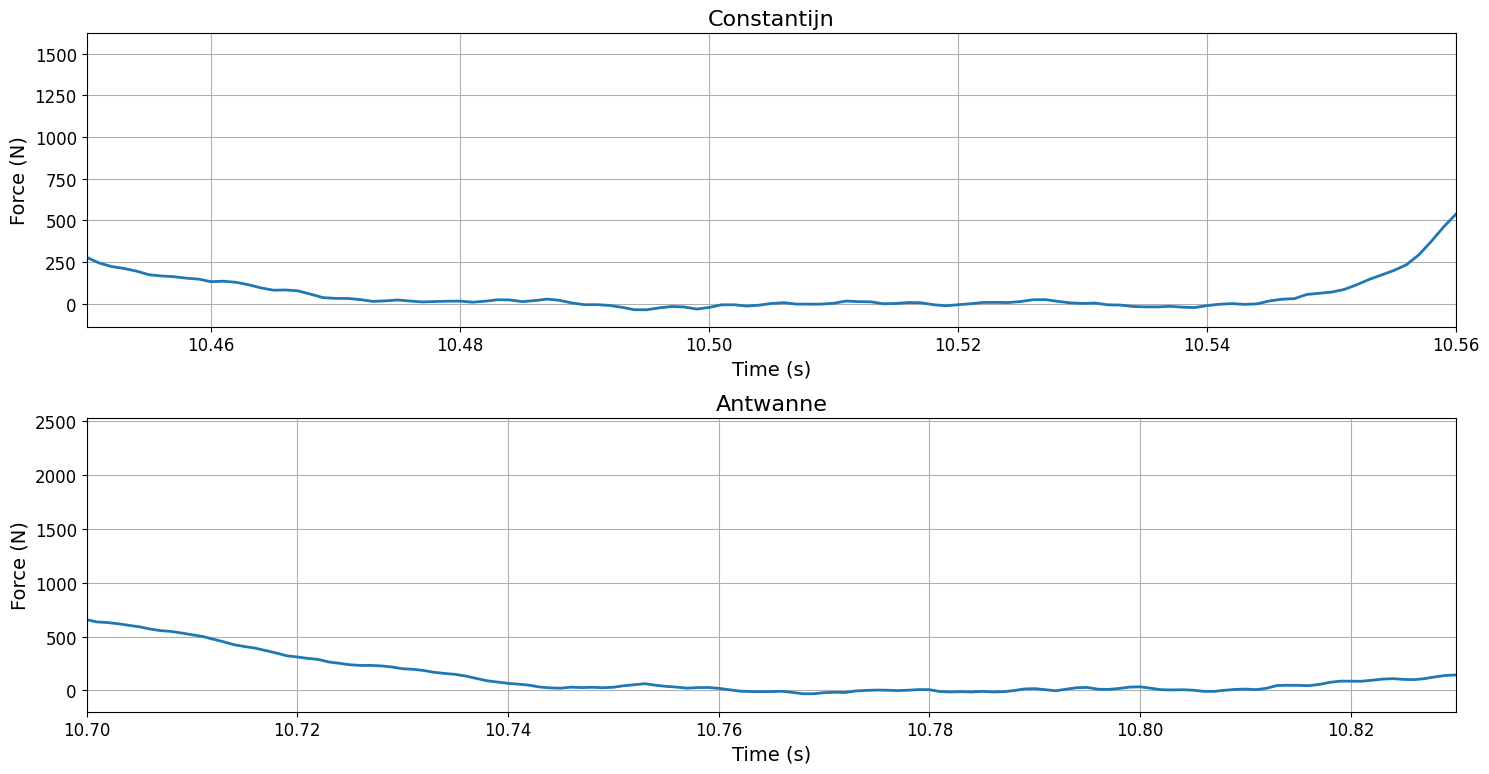

In [83]:
# Finding 'flying' phase to determine the offset
splot([t]*2, [Fz_C, Fz_A], axis = ['Time (s)','Force (N)'], xlim = [(10.45, 10.56), (10.70, 10.83)], stitles = ['Constantijn', 'Antwanne'])

In [75]:
# approximation of offsets: 
def get_offset(t1, t2, dt, F):
    N1, N2 = int(t1/dt), int(t2/dt)
    return np.mean(F[N1: N2+1])

dt = t[1] - t[0]
offset_C, offset_A = get_offset(10.50, 10.54, dt, Fz_C), get_offset(10.76, 10.80, dt, Fz_A)
print('Offsets\nConstantijn:\t', offset_C, 'N\t\tAntwanne:\t', offset_A, 'N')

Offsets
Constantijn:	 14.717102075 N		Antwanne:	 23.05202943902439 N


In [77]:
# set offsets
Fz_C -= offset_C
Fz_A -= offset_A

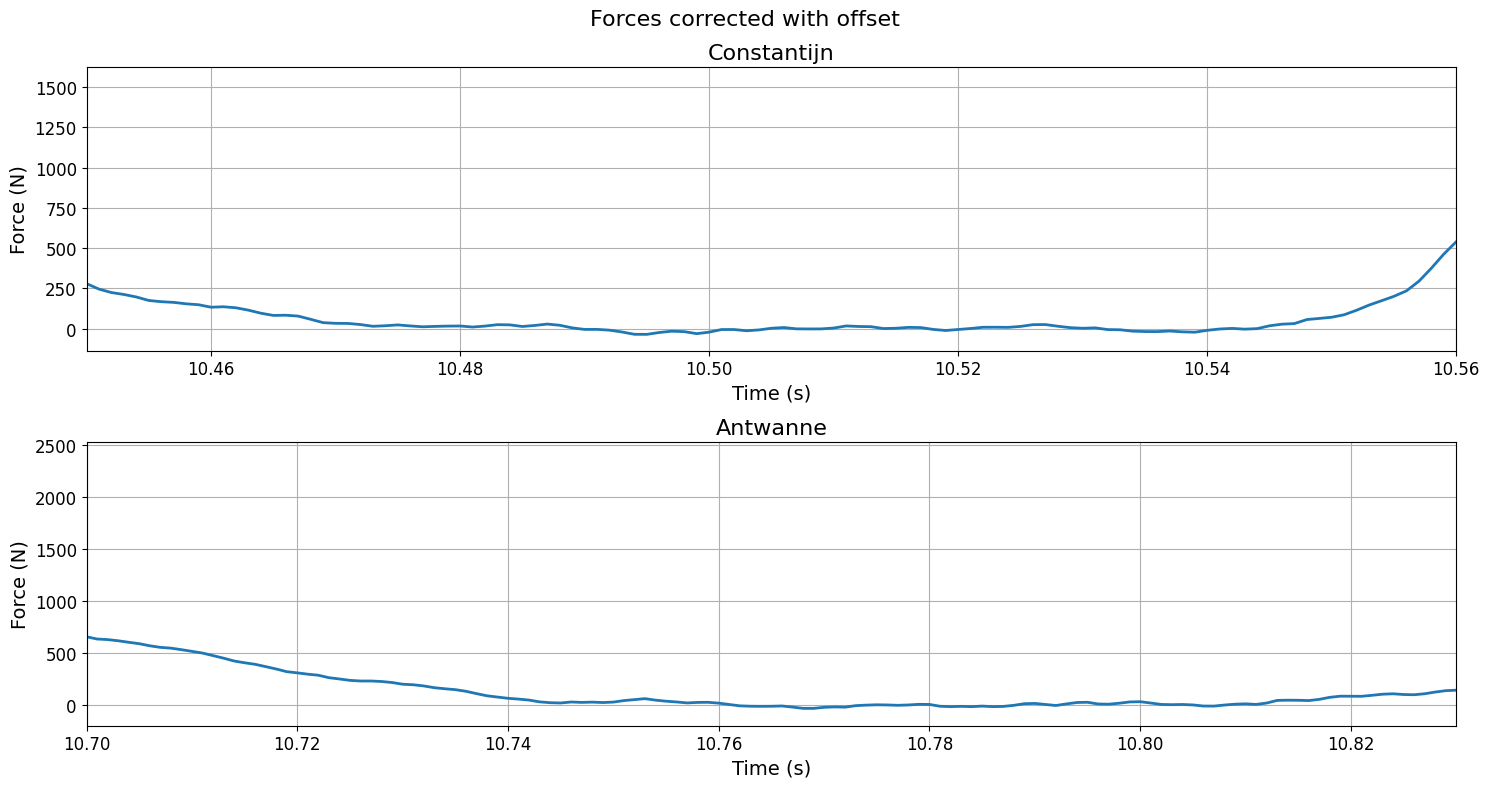

In [82]:
splot([t]*2, [Fz_C, Fz_A], axis = ['Time (s)','Force (N)'], title = 'Forces corrected with offset', xlim = [(10.45, 10.56), (10.70, 10.83)], stitles = ['Constantijn', 'Antwanne'])

#### Step 4: Determine VLR
1. Apply a zero-lag 4th order Butterworth low-pass filter (cut-off of 80 Hz) on the vertical component of the ground reaction force (tip: scipy package)
2. Time derive the filtered signal

#### Step 5: Determine the initial foot contact
A foot contact is detected if the vertical force crosses a certain threshold (50N). Make sure to filter out noise from the other foot (check the visualized data in step 3 to figure out how to do this). Plot the detected initial foot contacts to verify that all foot contacts were detected.

#### Step 6: Determine VILR
The VILR is the maximum value measured during the first 50ms after initial foot contact.
Report for two members of the group (three in groups of five) the values of minimum, mean and maximum VILR of at least 10 foot steps.

Tip: report the VILR values in BW/s - you might want to use the static measurements for this conversion.

#### Step 7: Discussion
Create a figure to report the loading rate of each subject and compare this with the data of Chan et al 2018 (lecture slides).

Briefly discuss your conclusions regarding the students' injury risk. (Add a new markdown cell in which you can type your conclusions and add your figures).